## Importation

In [1]:
import pandas as pd
import numpy as np
import os

data_path = "./../data"
dataset_name = "train.csv"

dataset = os.path.join(data_path, dataset_name)

import_col = ['Id', 'MSZoning' , 'LotArea', 'Neighborhood',  'OverallQual', 
              'OverallCond','TotalBsmtSF','CentralAir','1stFlrSF', 
              '2ndFlrSF', 'KitchenQual','TotRmsAbvGrd','Fireplaces',
              'GarageArea', 'PoolArea','MiscFeature','MiscVal', 'MoSold', 
              'YrSold', 'SaleType','SaleCondition', 'SalePrice']


df_all = pd.read_csv(dataset, usecols= import_col, index_col='Id')

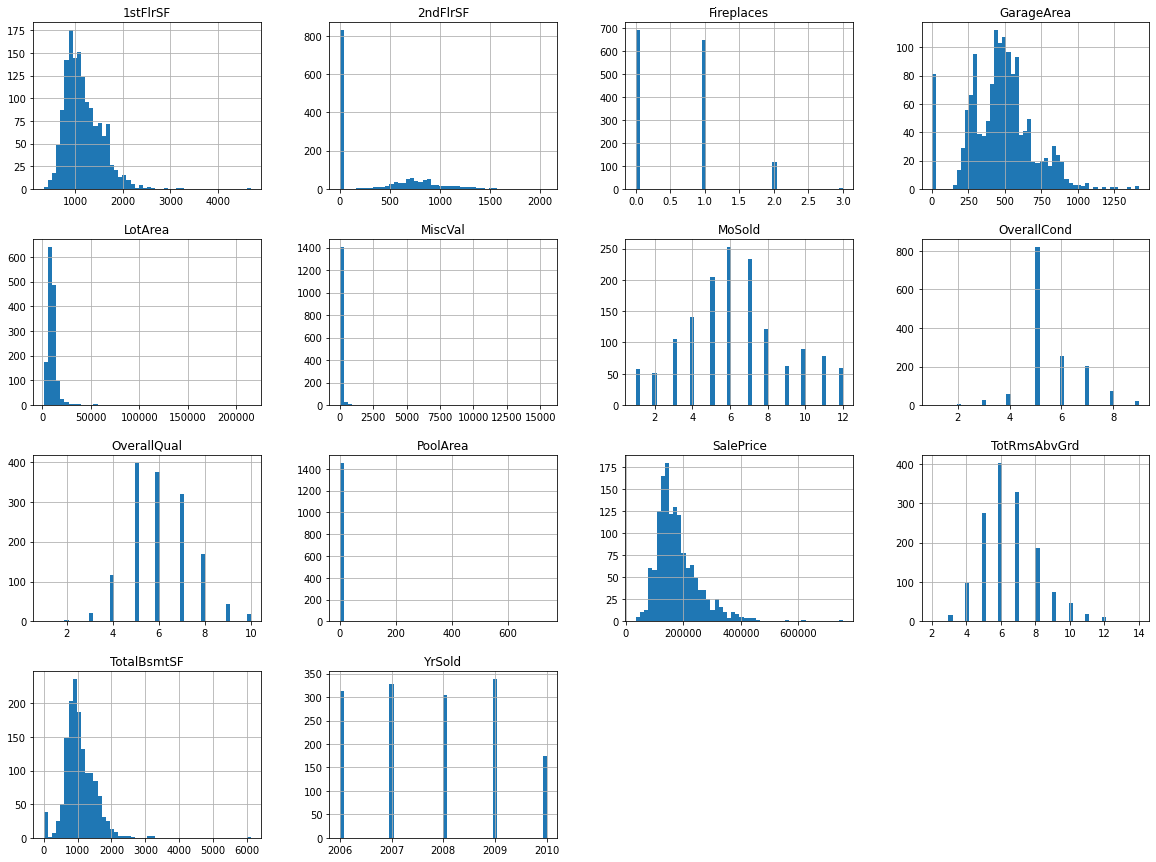

In [2]:
# visualise numerical data from new features from qual_col
import matplotlib.pyplot as plt
df_all.hist(bins = 50, figsize=(20,15))
plt.show()


In [3]:
df_all.isnull().sum()

MSZoning            0
LotArea             0
Neighborhood        0
OverallQual         0
OverallCond         0
TotalBsmtSF         0
CentralAir          0
1stFlrSF            0
2ndFlrSF            0
KitchenQual         0
TotRmsAbvGrd        0
Fireplaces          0
GarageArea          0
PoolArea            0
MiscFeature      1406
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
dtype: int64

## Split into test and train

In [4]:
# Split df into train and test DataFrames
from preprocessing import selectTestTrainSetId

train_id, test_id = selectTestTrainSetId(df_all.index, 0.2)
df_train = df_all.loc[train_id]
df_test = df_all.loc[test_id]

## First work features

In [5]:
# transform 'Y' and 'N' of the columns 'CentralAir' into 0 and 1.
d = {'Y' : 1, 'N' : 0}
df_train["CentralAir"].replace(to_replace = d, inplace =True)


In [6]:
# Transform the Excellent, Good, Typical/Average, Fair and Poor values to 
# numerate values : 5, 4, 3, 2 and 1 in the column KitchenQual.

d = {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa': 2, 'Po': 1}
df_train["KitchenQual"].replace(to_replace = d, inplace =True)

## Features

In [7]:
# Qualitative data :

# MSZoning: Identifies the general zoning classification of the sale.
# Neighborhood: Physical locations within Ames city limits
# MiscFeature: Miscellaneous feature not covered in other categories
# SaleType: Type of sale
# SaleCondition: Condition of sale  
# MoSold: Month Sold (MM)
# YrSold: Year Sold (YYYY)

qual_col = ['MSZoning', 'Neighborhood', 'MiscFeature','SaleType', 
            'SaleCondition' , 'MoSold', 'YrSold',]

# Quantitative data : 

# LotArea: Lot size in square feet              
# OverallQual: Rates the overall material and finish of the house
# OverallCond: Rates the overall condition of the house
# TotalBsmtSF: Total square feet of basement area
# CentralAir: Central air conditioning
# 1stFlrSF: First Floor square feet
# 2ndFlrSF: Second floor square feet
# KitchenQual: Kitchen quality
# TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
# Fireplaces: Number of fireplaces
# GarageArea: Size of garage in square feet
# PoolArea: Pool area in square feet
# MiscVal: $Value of miscellaneous feature

quant_col = ['LotArea', 'OverallQual', 'OverallCond','TotalBsmtSF',
             'CentralAir','1stFlrSF', '2ndFlrSF', 'KitchenQual', 
             'TotRmsAbvGrd','Fireplaces','GarageArea', 'PoolArea','MiscVal']

# To estimate :

# SalePrice: price of sale

to_predict_col = ['SalePrice']


In [8]:
features_col = quant_col + to_predict_col
df_quant = df_train[features_col]    

## Correlation

In [9]:
corr_matrix = df_quant.corr()
corr_matrix

,LotArea,OverallQual,OverallCond,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageArea,PoolArea,MiscVal,SalePrice
LotArea,1.000000,0.099127,-0.004369,0.263559,0.044895,0.293765,0.044687,0.056101,0.182195,0.276617,0.171145,0.077747,0.040498,0.249049
OverallQual,0.099127,1.000000,-0.094453,0.550327,0.280070,0.484251,0.275601,0.667292,0.408470,0.406775,0.548379,0.067708,-0.023296,0.783971
OverallCond,-0.004369,-0.094453,1.000000,-0.169475,0.140768,-0.139230,0.043562,-0.033644,-0.035574,-0.002306,-0.149388,0.015798,0.080098,-0.079830
TotalBsmtSF,0.263559,0.550327,-0.169475,1.000000,0.212698,0.823218,-0.162100,0.437625,0.301794,0.343984,0.489712,0.152513,-0.006869,0.617705
CentralAir,0.044895,0.280070,0.140768,0.212698,1.000000,0.135394,-0.015680,0.257526,0.024975,0.195978,0.223034,0.015333,0.017402,0.257379
1stFlrSF,0.293765,0.484251,-0.139230,0.823218,0.135394,1.000000,-0.192623,0.389228,0.419137,0.417107,0.493987,0.168435,-0.011080,0.612494
2ndFlrSF,0.044687,0.275601,0.043562,-0.162100,-0.015680,-0.192623,1.000000,0.158839,0.613777,0.192097,0.127908,0.066126,0.008898,0.305870
KitchenQual,0.056101,0.667292,-0.033644,0.437625,0.257526,0.389228,0.158839,1.000000,0.282229,0.252714,0.472252,0.081282,-0.045124,0.651201
TotRmsAbvGrd,0.182195,0.408470,-0.035574,0.301794,0.024975,0.419137,0.613777,0.282229,1.000000,0.333149,0.328380,0.067858,0.017678,0.522717
Fireplaces,0.276617,0.406775,-0.002306,0.343984,0.195978,0.417107,0.192097,0.252714,0.333149,1.000000,0.270197,0.090407,0.007371,0.483097


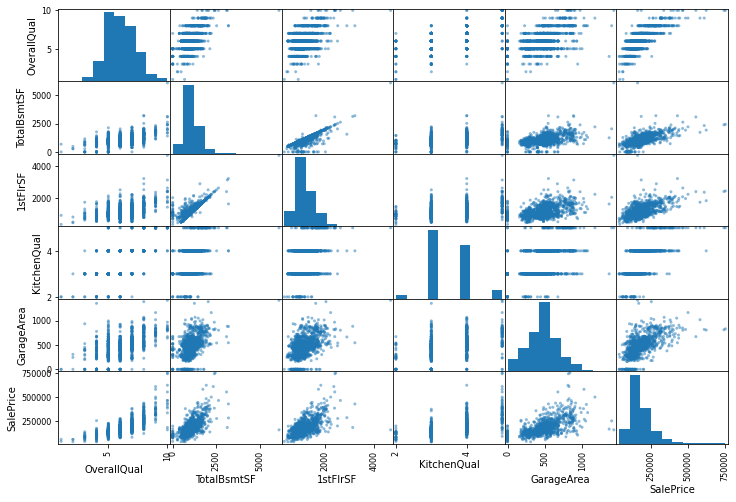

In [10]:
from pandas.plotting import scatter_matrix

t = 0.6
to_visualize = [c for c in corr_matrix.columns if corr_matrix[c]['SalePrice'] > t]

scatter_matrix(df_quant[to_visualize], figsize = (12,8))
plt.show()


## Feature ingeniering

In [25]:
# transform the square feet of the second floor into existence of a second floor.
# Could had criminality data to the dataset.
# split garage area into two feature : existence of a garage and the area (normalised), is this perform better ?

## Preprocessing

In [17]:
features = []
feature_to_encod = ["MSZoning.
# one-hot-encoding on the Neighborhood.
# One-hot-encoding on the SaleCondition.
# One-hot-encoding on the MiscFeature."]

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.impute import SimpleImputer 
from preprocessing import OneHotEncodTransformer

preprocess_pip = Pipeline([
                ('one_hot_encoder', OneHotEncodTransformer(feature_to_encod)),
                ('imputer', SimpleImputer()),
                ('std_scaler', StandardScaler()),
                ])

In [ ]:
###############################################################################
